# X Education - Lead Score Case Study 

Identification of hot leads to put more focus on them and improve the conversion rate.


# Business Problem
X Education company has provided us with some past data. Our task is to accurately categorise lead as 'Hot leads' and 'Cold leads'. So that the company can focus more on the hot leads and improve its conversion rate. Our target is to achieve 80% Conversion rate, to achieve this we must accurately categorize the leads. 

### Steps to be Followed
1. Analyzing and Understanding data 
2. Data Cleaning and Treating
3. Creating Dummy Varibale
4. Splitting and Scaling data
5. Model Building
6. Model Evaluation
7. Observations

In [729]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [730]:
# importing data-set
leads = pd.read_csv('C:/Users/Lenovo/Downloads/upGrad Notes/Capstone Project/Lead Scoring Assignment/Leads.csv')
leads.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Step 1: Analysing and understanding data

In [731]:
# checking number of rows and columns
leads.shape

(9240, 37)

In [732]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [733]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [734]:
# checking duplicate values
sum(leads.duplicated(subset = 'Prospect ID')) == 0

True

In [735]:
sum(leads.duplicated(subset = 'Lead Number')) == 0

True

#### Prospect ID and Lead Number have no duplicate values. They simply represent the unique ID of contacted people and lead. 

## Step 2: Cleaning and Treating data

In [736]:
# Prospect ID and Lead Number are not important for our analysis so they can be dropped.
leads.drop(['Lead Number','Prospect ID'], axis= 1, inplace= True) 

In [737]:
# Some columns have 'Select' as value, this is simply a nan value.
#Converting 'Select' values to NaN.
leads = leads.replace('Select', np.nan)

In [738]:
leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [739]:
# Percentage of null values.
100*(round(leads.isnull().sum()/len(leads.index),4))

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [740]:
# Dropping columns with more than 40% null values.
cols = leads.columns

for i in cols:
    if (100*(round(leads[i].isnull().sum()/len(leads.index),4)) >= 40):
        leads.drop(i, axis=1, inplace = True) 

In [741]:
# checking null values again
100*(round(leads.isnull().sum()/len(leads.index),4))

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

### Categorical Values analysis:

In [742]:
# analysing country column
leads['Country'].value_counts(dropna= False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

There are over 2400 missing values. Since this is an important column, we can try to impute the values.

E:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


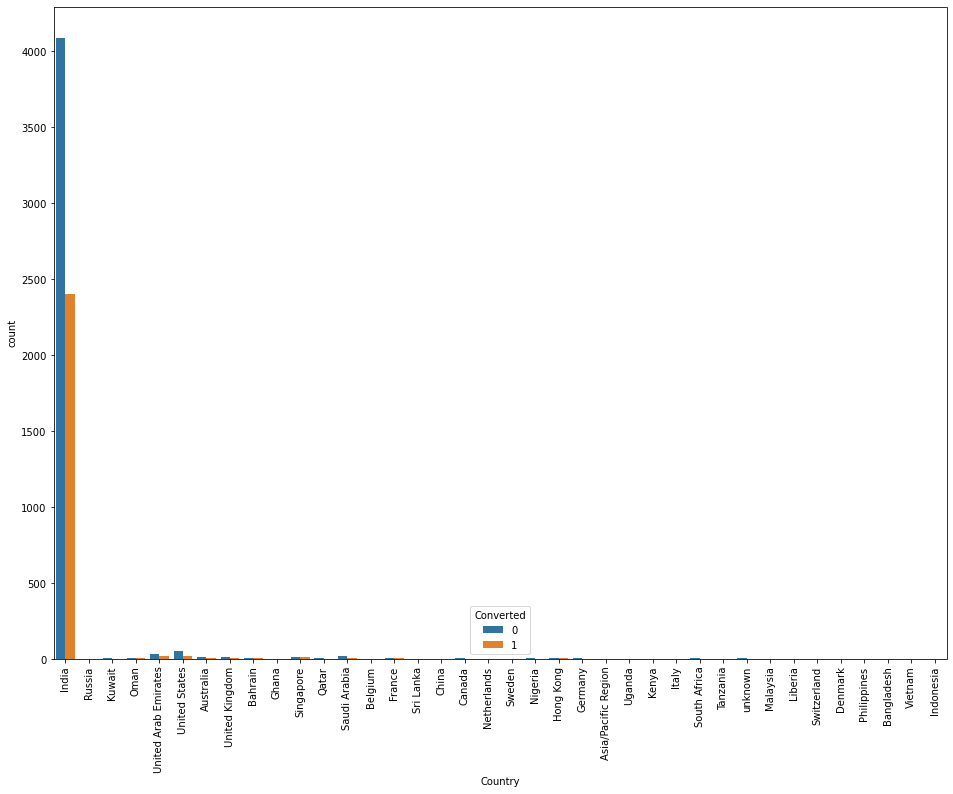

In [743]:
# lets plot a graph and try to get some insights.
plt.figure(figsize= (16,12))
s = sns.countplot(leads.Country, hue = leads.Converted)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
plt.show()

Since India is most common among non missing values, We can simply impute missing values with India.

In [744]:
leads['Country'] = leads['Country'].replace(np.nan, 'India')

In [745]:
leads['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

E:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


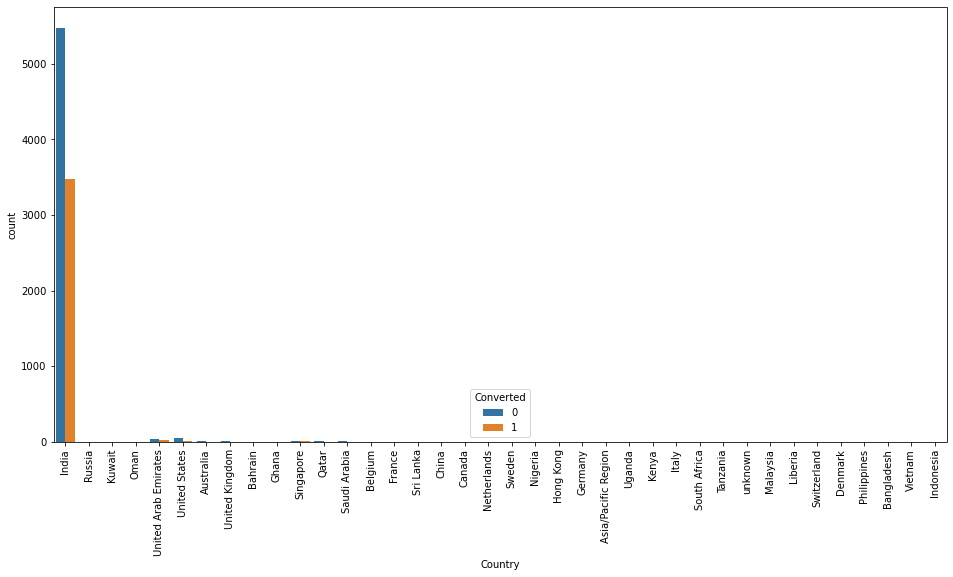

In [746]:
# plotting once again
plt.figure(figsize= (16,8))
s = sns.countplot(leads.Country, hue = leads.Converted)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
plt.show()

In [747]:
# Now majority of the values are from India we can safely drop this column.
leads.drop(['Country'], axis = 1, inplace = True)

In [748]:
#checking value counts of "City" column
leads['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [749]:
# Imputing missing values with 'Mumbai'
leads['City'] = leads['City'].replace(np.nan,'Mumbai')

E:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


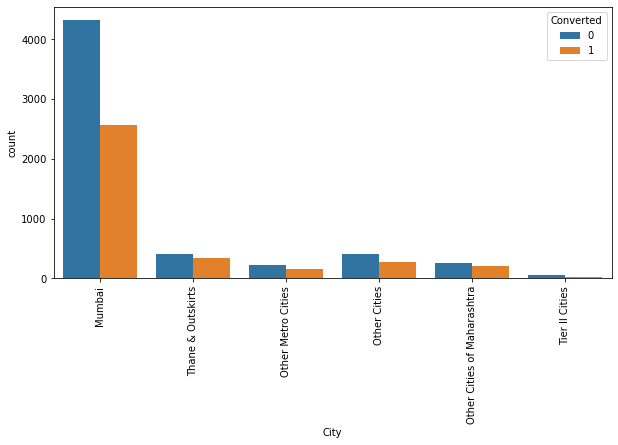

In [750]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(10,5))
s=sns.countplot(leads.City, hue=leads.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [751]:
# checking value counts of Specialization
leads['Specialization'].value_counts(dropna = False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [752]:
# Here, the nan values could mean that either the leads are students or they don't have a specialization yet.
# replacing nan with not specified.
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not specified')

E:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


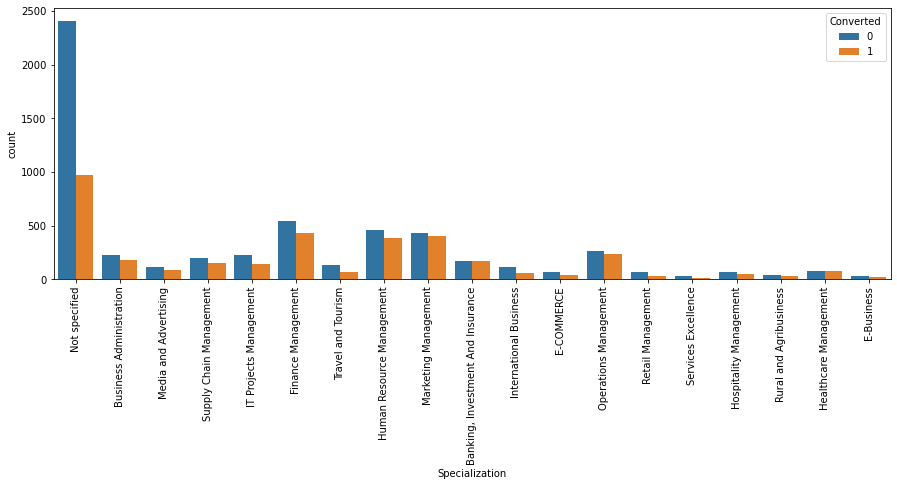

In [753]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s=sns.countplot(leads.Specialization, hue=leads.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

#### Here specializations in management studies have a higher number of leads and lead conversions. So specialization is significant varibales


In [754]:
#combining Management Specializations because they show similar trends
leads['Specialization'] = leads['Specialization'].replace (['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'], 'Management Specializations')

E:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


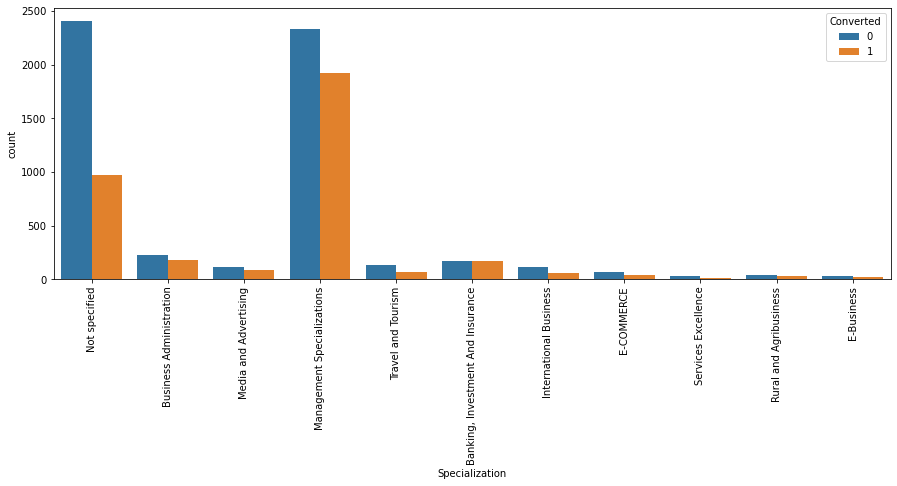

In [755]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s=sns.countplot(leads.Specialization, hue=leads.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [756]:
# Reviewing column 'What is your current occupation'
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [757]:
#imputing Nan values with mode "Unemployed"
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

In [758]:
#checking count of values
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

E:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


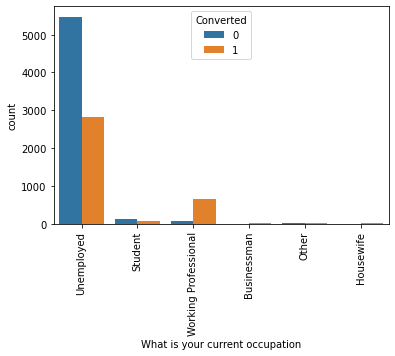

In [759]:
#visualizing count of Variable based on Converted value

s=sns.countplot(leads['What is your current occupation'], hue=leads.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

- Unemployed people have the highest number of leads and leads conversion.
- Working professionals looking for a course have higher chance of joining it.


In [760]:
# Reviewing column 'What matters most to you in choosing a course'
leads['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [761]:
#replacing Nan values with Mode "Better Career Prospects"
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

E:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


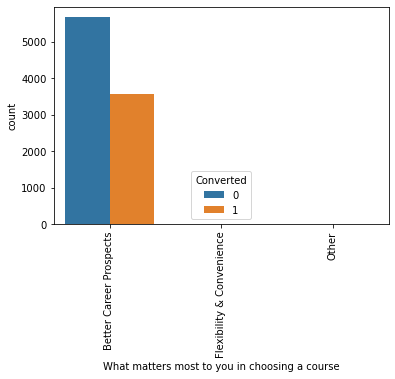

In [762]:
#visualizing count of Variable based on Converted value

s=sns.countplot(leads['What matters most to you in choosing a course'], hue=leads.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [763]:
# Reviewing column 'What matters most to you in choosing a course'
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

Again we have a column that is worth dropping. Because majority of the values lie in one category (Better Career Prospects) which will not help in our analysis.

In [764]:
leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)

In [765]:
100*(round(leads.isnull().sum()/len(leads.index),4))

Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Specialization                               0.00
What is your current occupation              0.00
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00
Receive More Updates About Our Courses       0.00
Tags                                        36.29


In [766]:
# Analysing Tags column
leads['Tags'].value_counts(dropna = False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [767]:
# Replacing nan with 'Not Specified'
leads['Tags'] = leads['Tags'].replace(np.nan, 'Not Specified')

E:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


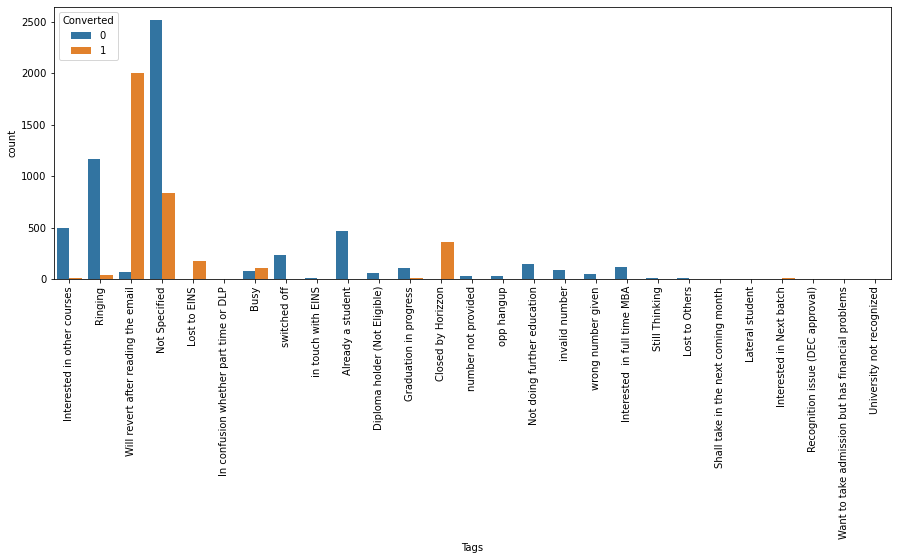

In [768]:
# Visualizing count of Tags based on Converted value

plt.figure(figsize=(15,5))
s=sns.countplot(leads['Tags'], hue=leads.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

Here we can see there are a lot of tags with very low frequency, they can make our analysis complicated. Lets combine them


In [769]:
# Lets replace low frequency tags with "Other Tags"
leads['Tags'] = leads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

leads['Tags'] = leads['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

E:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


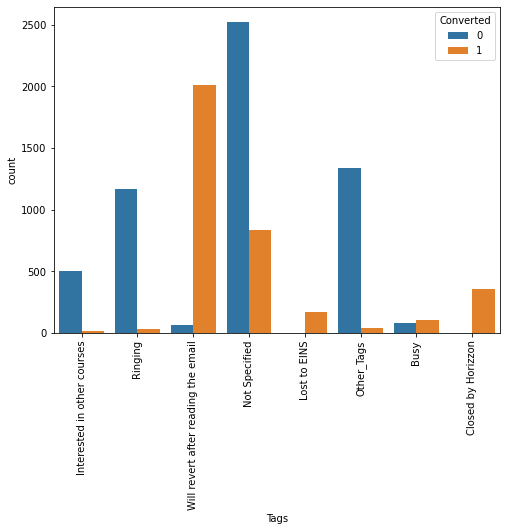

In [770]:
plt.figure(figsize = (8,6))
s= sns.countplot(leads['Tags'], hue = leads.Converted)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
plt.show()

 Now, it looks a lot cleaner.

In [771]:
# checking percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                                        0.00
Update me on Supply 

In [772]:
# Analysing 'Lead Source' column
leads['Lead Source'].value_counts(dropna = False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [773]:
# It would be better to group low frequency values under common label others. 
# replacing nan with others and combining low frequency values.

leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                     'testone','NC_EDM','Live Chat'] ,'Others')                                                   

E:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


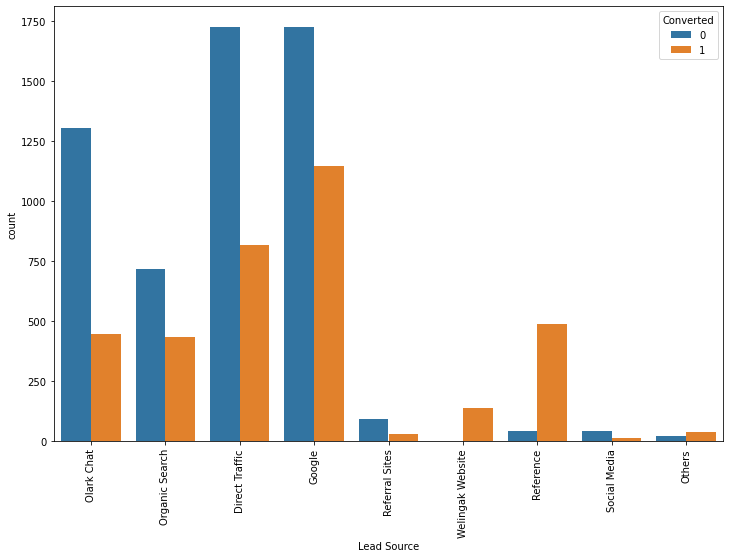

In [774]:
# visualising 'Lead Source' after conversion
plt.figure(figsize=(12,8))
s = sns.countplot(leads['Lead Source'], hue = leads.Converted)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
plt.show()

#### Inference
- Maximum number of leads are generated by Google and Direct traffic.
- Conversion Rate of reference leads and leads through welingak website is high.
- To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [775]:
# analysing column 'Last Activity'
leads['Last Activity'].value_counts(dropna = False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [776]:
#replacing Nan Values and combining low frequency values

leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Others')
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

E:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


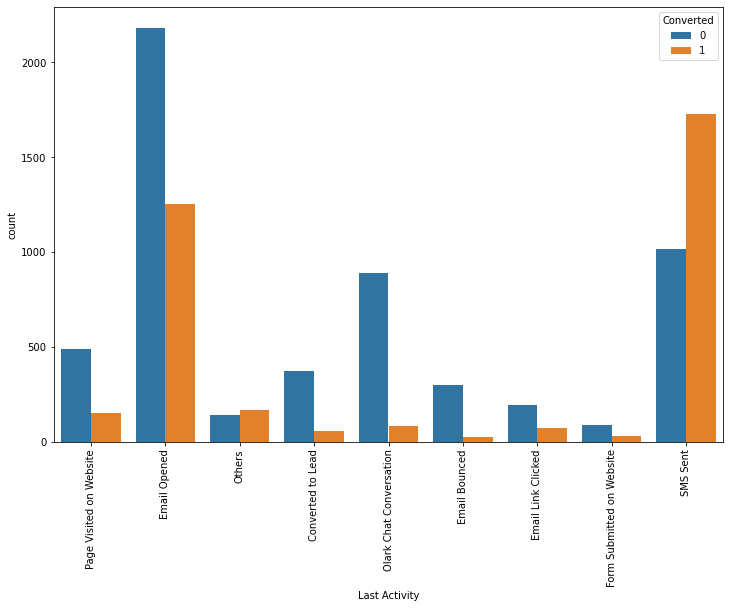

In [777]:
# visualising 'Last Activity' after conversion
plt.figure(figsize=(12,8))
s = sns.countplot(leads['Last Activity'], hue = leads.Converted)
s.set_xticklabels(s.get_xticklabels(), rotation = 90)
plt.show()

In [778]:
#Check the Null Values in All Columns:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                                        0.00
Update me on Supply 

In [779]:
# Drop all the rows with nan values. Since these values are very low deleting them won't affect our analysis.
leads = leads.dropna()

In [780]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content       

Now we don't have any null values

E:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


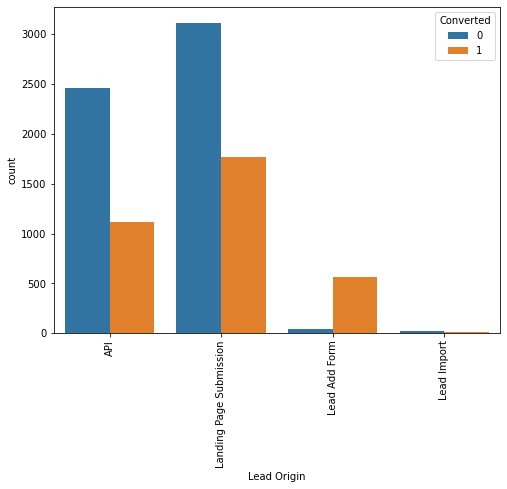

In [781]:
# Visualising 'Lead Origin'
plt.figure(figsize = (8,6))
s = sns.countplot(leads['Lead Origin'], hue = leads.Converted)
s = s.set_xticklabels(s.get_xticklabels(), rotation = 90)
plt.show()

#### Inference
- API and Landing Page Submission bring higher number of leads as well as conversion.
- Lead Add Form has a very high conversion rate but count of leads are not very high.
- Lead Import and Quick Add Form get very few leads.
- In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

E:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


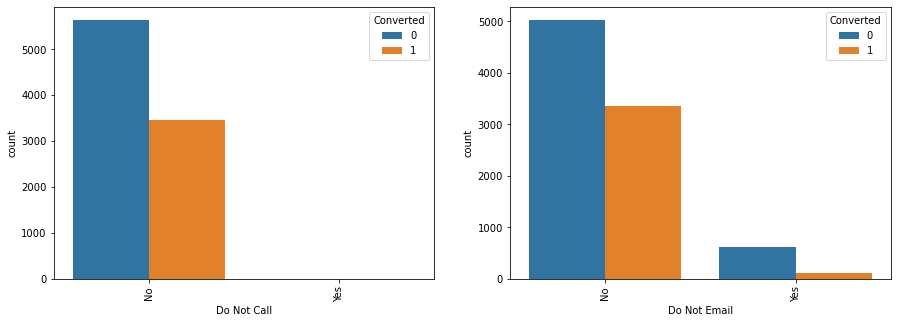

In [782]:
# Visualising variable 'Do Not Email' & 'Do Not Call'

plt.figure(figsize=(15,5))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(leads['Do Not Call'], hue=leads.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(leads['Do Not Email'], hue=leads.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [783]:
# Do Not Call value count
leads['Do Not Call'].value_counts(dropna =False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [784]:
# Do Not Email value count
leads['Do Not Email'].value_counts(dropna =False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

In [785]:
# We can drop 'Do Not Call' column since most of its values are from one category 'No'
leads.drop('Do Not Call',axis = 1, inplace = True)

In [786]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9103 non-null   object 
 1   Lead Source                               9103 non-null   object 
 2   Do Not Email                              9103 non-null   object 
 3   Converted                                 9103 non-null   int64  
 4   TotalVisits                               9103 non-null   float64
 5   Total Time Spent on Website               9103 non-null   int64  
 6   Page Views Per Visit                      9103 non-null   float64
 7   Last Activity                             9103 non-null   object 
 8   Specialization                            9103 non-null   object 
 9   What is your current occupation           9103 non-null   object 
 10  Search                              

#### Checking other variables that can be dropped.

In [787]:
leads['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [788]:
leads.Magazine.value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

In [789]:
leads['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [790]:
leads.Search.value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

In [791]:
leads['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [792]:
leads['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [793]:
leads['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [794]:
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [795]:
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [796]:
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [797]:
leads['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

In [798]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [799]:
leads['What is your current occupation'].value_counts(dropna=False)

Unemployed              8185
Working Professional     679
Student                  207
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [800]:
leads['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

In [801]:
# We can drop the following columns as most of there values are concentrated in a single category.

leads.drop(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [802]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

In [803]:
#checking value counts of last Notable Activity
leads['Last Notable Activity'].value_counts(dropna = False)

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [804]:
#clubbing lower frequency values

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam',
                                                                         'Unreachable','Unsubscribed','Email Bounced',                                                                    
                                                                         'Resubscribed to emails','View in browser link Clicked',
                                                                         'Approached upfront','Form Submitted on Website', 
                                                                         'Email Received'],'Other_activities')

In [805]:
#checking value counts of last Notable Activity
leads['Last Notable Activity'].value_counts(dropna = False)

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_activities            160
Name: Last Notable Activity, dtype: int64

E:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


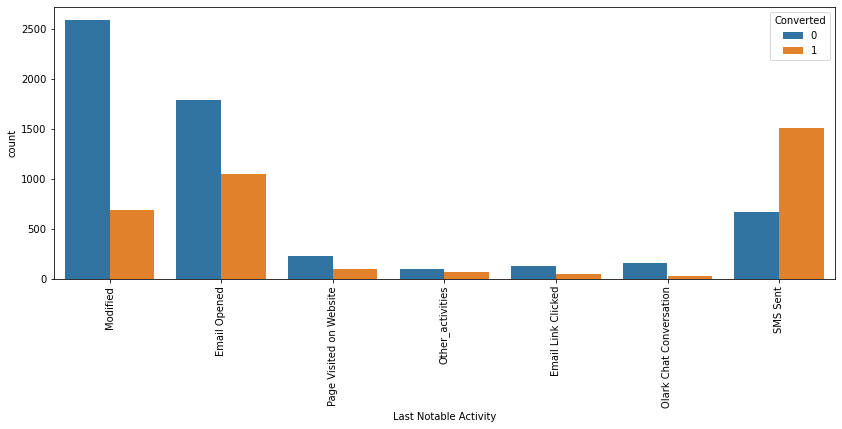

In [806]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,5))
s=sns.countplot(leads["Last Notable Activity"], hue = leads.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

### Analysing Numerical Attributes

In [807]:
# Checking % of data where converted value = 1

conv_sum = (sum(leads['Converted'])/len(leads['Converted'].index))*100
conv_sum

38.02043282434362

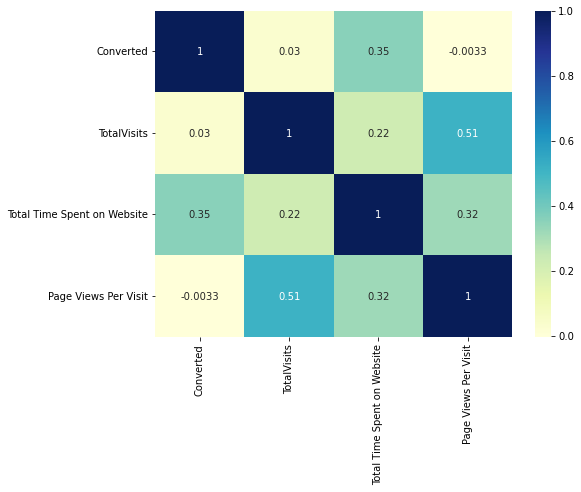

In [808]:
# Checking correlation between numerical variables
plt.figure(figsize = (8,6))

sns.heatmap(leads.corr(), cmap= 'YlGnBu', annot = True)
plt.show()

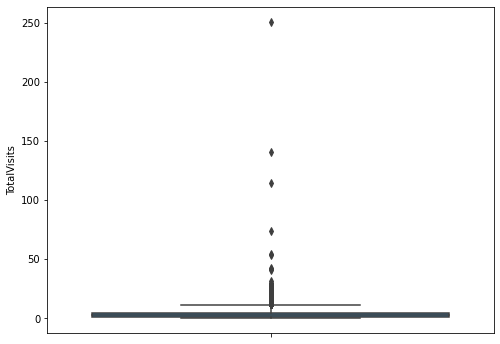

In [809]:
# Visualizing spread of 'TotalVisits'

plt.figure(figsize = (8,6))
sns.boxplot(y= leads['TotalVisits'])
plt.show()

There are some outliers

In [810]:
# checking percentile values
leads['TotalVisits'].describe(percentiles = [0.05, 0.25,0.5,0.75,0.90,0.95,0.99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

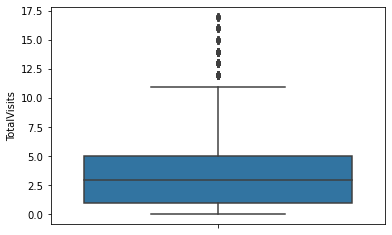

In [811]:
# Treating outliers
# Removing top 1% of the values from TotalVisits

top_1 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= top_1)]

sns.boxplot(y= leads['TotalVisits'])
plt.show()


In [812]:
leads.shape

(9020, 14)

In [813]:
# checking percentiles for 'Total Time Spent on Website'
leads['Total Time Spent on Website'].describe(percentiles = ([0.05,0.25,0.50,0.75,0.90,0.95,0.99]))

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<AxesSubplot:ylabel='Total Time Spent on Website'>

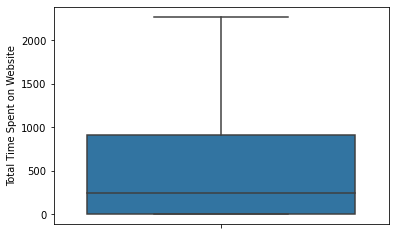

In [814]:
# visualising 'Total Time Spent on Website'
sns.boxplot(y= leads['Total Time Spent on Website'])

No outliers detected.

In [815]:
#checking "Page Views Per Visit"
leads['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

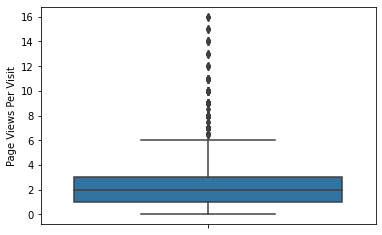

In [816]:
#visualizing spread of 'Page Views Per Visit'

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [817]:
# Removing top 1% of values
Q = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= Q]

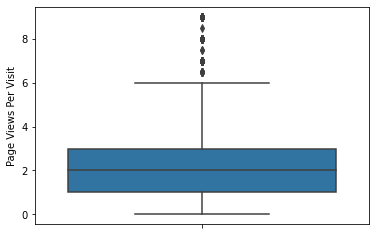

In [818]:
#visualizing spread of 'Page Views Per Visit'

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

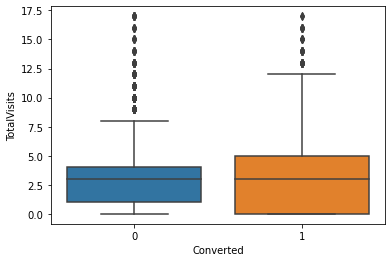

In [819]:
# checking spread of 'TotalVisits' and 'Converted'
sns.boxplot(y = leads['TotalVisits'], x= leads['Converted'])
plt.show()

Inference
- Median for converted and not converted leads are the close.
- Nothng conclusive can be said on the basis of Total Visits

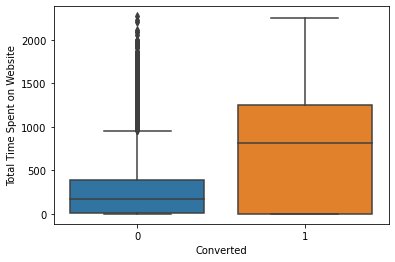

In [820]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x= leads['Converted'], y = leads['Total Time Spent on Website'])
plt.show()

Inference
- Leads spending more time on the website are more likely to be converted.
- Website should be made more engaging to make leads spend more time.

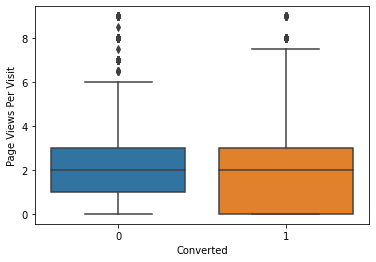

In [821]:
#checking Spread of "Page Views Per Visit" vs Converted variable
sns.boxplot(x= leads['Converted'], y = leads['Page Views Per Visit'])
plt.show()

Inference
- Median for converted and unconverted leads is the same.
- Nothing can be said specifically for lead conversion from Page Views Per Visit

In [822]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not specified,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not specified,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified


## Step 3: Creating Dummy Varibale

In [823]:
#getting a list of categorical columns
cat_col = leads.select_dtypes(include = ['object']).columns
cat_col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [824]:
# varibales with binary values (Yes, No)
lst = ['A free copy of Mastering The Interview', 'Do Not Email']

# Defining the map function
def map_fun(x):
    return x.map({'Yes': 1, 'No': 0})

# applying function
leads[lst] = leads[lst].apply(map_fun)

In [825]:
leads['Specialization'].value_counts()

Management Specializations           4126
Not specified                        3284
Business Administration               390
Banking, Investment And Insurance     325
Media and Advertising                 197
Travel and Tourism                    189
International Business                171
E-COMMERCE                            107
Rural and Agribusiness                 70
E-Business                             56
Services Excellence                    38
Name: Specialization, dtype: int64

In [826]:
# Creating dummies
dummy = pd.get_dummies(leads[['What is your current occupation','City','Lead Origin']], drop_first = True)
leads = pd.concat([leads,dummy],axis = 1)

In [827]:
dummy = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
dummy = dummy.drop('Specialization_Not specified', 1)
leads= pd.concat([leads, dummy], 1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6960\2056324324.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dummy = dummy.drop('Specialization_Not specified', 1)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6960\2056324324.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  leads= pd.concat([leads, dummy], 1)


In [828]:
dummy = pd.get_dummies(leads['Lead Source'], prefix = 'Lead Source')
dummy = dummy.drop('Lead Source_Others', 1)

leads= pd.concat([leads, dummy], 1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6960\4241909745.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dummy = dummy.drop('Lead Source_Others', 1)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6960\4241909745.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  leads= pd.concat([leads, dummy], 1)


In [829]:
dummy = pd.get_dummies(leads['Last Activity'], prefix = 'Last Activity')
dummy = dummy.drop('Last Activity_Others', 1)
leads= pd.concat([leads, dummy], 1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6960\3627268824.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dummy = dummy.drop('Last Activity_Others', 1)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6960\3627268824.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  leads= pd.concat([leads, dummy], 1)


In [830]:
dummy = pd.get_dummies(leads['Tags'], prefix = 'Tags')
dummy = dummy.drop('Tags_Not Specified', 1)

leads= pd.concat([leads, dummy], 1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6960\453042430.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dummy = dummy.drop('Tags_Not Specified', 1)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6960\453042430.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  leads= pd.concat([leads, dummy], 1)


In [831]:
dummy = pd.get_dummies(leads['Last Notable Activity'], prefix = 'Last Notable Activity')
dummy = dummy.drop('Last Notable Activity_Other_activities', 1)

leads= pd.concat([leads, dummy], 1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6960\3063060220.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dummy = dummy.drop('Last Notable Activity_Other_activities', 1)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6960\3063060220.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  leads= pd.concat([leads, dummy], 1)


In [832]:
# Dropping the original columns, we don't need them anymore
leads.drop(cat_col, axis = 1, inplace = True)

In [833]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 56 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             8953 non-null   int64  
 1   TotalVisits                                           8953 non-null   float64
 2   Total Time Spent on Website                           8953 non-null   int64  
 3   Page Views Per Visit                                  8953 non-null   float64
 4   What is your current occupation_Housewife             8953 non-null   uint8  
 5   What is your current occupation_Other                 8953 non-null   uint8  
 6   What is your current occupation_Student               8953 non-null   uint8  
 7   What is your current occupation_Unemployed            8953 non-null   uint8  
 8   What is your current occupation_Working Professional  8953

## Step 4: Splitting and Scaling data

### Test-Train Split

In [834]:
from sklearn.model_selection import train_test_split

In [835]:
# storing response variable in y
y= leads['Converted']

In [836]:
# storing independent variables in x
X= leads.drop('Converted', axis = 1)

In [837]:
# Train- Test split
X_train, X_test, y_train , y_test= train_test_split(X, y , train_size = 0.7, test_size = 0.3, random_state = 100)

In [838]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,...,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
9196,5.0,1490,5.00,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4696,3.0,457,3.00,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3274,4.0,126,2.00,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2164,2.0,393,2.00,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1667,4.0,1167,1.33,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0


### Data Scaling


In [839]:
from sklearn.preprocessing import StandardScaler

In [840]:
# scaling numerical columns
scaler = StandardScaler()

num_cols = X_train.select_dtypes(include = ['float','int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,...,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
9196,0.668862,1.848117,1.455819,0,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4696,-0.030697,-0.037832,0.399961,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3274,0.319082,-0.642138,-0.127967,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2164,-0.380477,-0.154676,-0.127967,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1667,0.319082,1.258415,-0.481679,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0


## Step 5: Model Building


In [841]:
import statsmodels.api as sm

In [842]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(estimator = logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)
rfe.support_

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False,  True, False,  True,  True,
        True,  True,  True,  True, False, False,  True,  True, False,
        True])

In [843]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('What is your current occupation_Housewife', False, 31),
 ('What is your current occupation_Other', False, 34),
 ('What is your current occupation_Student', False, 23),
 ('What is your current occupation_Unemployed', False, 20),
 ('What is your current occupation_Working Professional', False, 8),
 ('City_Other Cities', False, 22),
 ('City_Other Cities of Maharashtra', False, 37),
 ('City_Other Metro Cities', False, 40),
 ('City_Thane & Outskirts', False, 38),
 ('City_Tier II Cities', False, 28),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 16),
 ('Specialization_Banking, Investment And Insurance', False, 14),
 ('Specialization_Business Administration', False, 39),
 ('Specialization_E-Business', False, 35),
 ('Specialization_E-COMMERCE', False, 21),
 ('Specialization_International Business', F

In [844]:
# rfe supported columns
sup_col = X_train.columns[rfe.support_]
sup_col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [845]:
# Building model

X_train_sm = sm.add_constant(X_train[sup_col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1254.7
Date:                Tue, 02 May 2023   Deviance:                       2509.3
Time:                        22:36:04   Pearson chi2:                 8.34e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6048
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1899      0.088    -13.480      0.000      -1.363      -1.017
Total Time Spent on Website                       0.8970      0.053     16.999      0.000       0.794       1.000
Lead Origin_Lead Add Form                         1.6712      0.450      3.714      0.000       0.789       2.553
Lead Source_Direct Traffic                       -0.8320      0.129     -6.471      0.000      -1.084      -0.580
Lead Source_Referral Sites                       -0.5284      0.465     -1.138      0.255      -1.439       0.382
Lead Source_Welingak Website                      3.9043      1.110      3.518      0.000       1.729       6.079
Last Activity_SMS Sent                            1.2373      0.223      5.555      0.000       0.801       1.674
Tags_Closed by Horizzon                           6.9834      1.019      6.853      0.000       4.986       8.981
Tags_Interested in other courses                 -2.1641      0.407     -5.321      0.000      -2.961      -1.367
Tags_Lost to EINS                                 5.7302      0.608      9.419      0.000       4.538       6.923
Tags_Other_Tags                                  -2.4417      0.210    -11.633      0.000      -2.853      -2.030
Tags_Ringing                                     -3.5858      0.243    -14.752      0.000      -4.062      -3.109
Tags_Will revert after reading the email          4.4263      0.185     23.989      0.000       4.065       4.788
Last Notable Activity_Modified                   -1.2839      0.150     -8.532      0.000      -1.579      -0.989
Last Notable Activity_Olark Chat Conversation    -1.7123      0.490     -3.496      0.000      -2.672      -0.752
Last Notable Activity_SMS Sent                    1.0151      0.257      3.943      0.000       0.511       1.520
=================================================================================================================
"""

p-value of variable 'Lead Source_Referral Sites' is high, so we can drop it.

In [846]:
sup_col = sup_col.drop('Lead Source_Referral Sites',1)

In [847]:
# Building model #2nd

X_train_sm = sm.add_constant(X_train[sup_col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1255.3
Date:                Tue, 02 May 2023   Deviance:                       2510.7
Time:                        22:36:05   Pearson chi2:                 8.34e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6047
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2029      0.088    -13.729      0.000      -1.375      -1.031
Total Time Spent on Website                       0.8963      0.053     16.979      0.000       0.793       1.000
Lead Origin_Lead Add Form                         1.6795      0.450      3.735      0.000       0.798       2.561
Lead Source_Direct Traffic                       -0.8224      0.128     -6.409      0.000      -1.074      -0.571
Lead Source_Welingak Website                      3.9060      1.110      3.520      0.000       1.731       6.081
Last Activity_SMS Sent                            1.2437      0.223      5.584      0.000       0.807       1.680
Tags_Closed by Horizzon                           6.9868      1.019      6.857      0.000       4.990       8.984
Tags_Interested in other courses                 -2.2028      0.409     -5.391      0.000      -3.004      -1.402
Tags_Lost to EINS                                 5.7337      0.608      9.426      0.000       4.541       6.926
Tags_Other_Tags                                  -2.4401      0.210    -11.625      0.000      -2.852      -2.029
Tags_Ringing                                     -3.5818      0.243    -14.740      0.000      -4.058      -3.106
Tags_Will revert after reading the email          4.4234      0.184     23.993      0.000       4.062       4.785
Last Notable Activity_Modified                   -1.2791      0.150     -8.501      0.000      -1.574      -0.984
Last Notable Activity_Olark Chat Conversation    -1.7079      0.489     -3.491      0.000      -2.667      -0.749
Last Notable Activity_SMS Sent                    1.0150      0.257      3.943      0.000       0.510       1.520
=================================================================================================================
"""

All the p-values are in check, now we can check VIF to check correlation between variables.

### Checking Variance Inflation Factor (VIF)

In [848]:
# importing variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [849]:
# Creating a dataframe that will store the vif values and names for each variable
vif = pd.DataFrame()
vif['Features'] = X_train[sup_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[sup_col].values, i) for i in range(X_train[sup_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_SMS Sent,6.22
4,Last Activity_SMS Sent,6.12
1,Lead Origin_Lead Add Form,1.82
11,Last Notable Activity_Modified,1.69
10,Tags_Will revert after reading the email,1.61
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
8,Tags_Other_Tags,1.26
0,Total Time Spent on Website,1.22
5,Tags_Closed by Horizzon,1.21


In [850]:
#dropping variable with high VIF

sup_col = sup_col.drop('Last Notable Activity_SMS Sent',1)

In [851]:
# rebuilding model #3

X_train_sm = sm.add_constant(X_train[sup_col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1263.3
Date:                Tue, 02 May 2023   Deviance:                       2526.6
Time:                        22:36:06   Pearson chi2:                 8.51e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6037
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1179      0.084    -13.382      0.000      -1.282      -0.954
Total Time Spent on Website                       0.8896      0.053     16.907      0.000       0.786       0.993
Lead Origin_Lead Add Form                         1.6630      0.455      3.657      0.000       0.772       2.554
Lead Source_Direct Traffic                       -0.8212      0.127     -6.471      0.000      -1.070      -0.572
Lead Source_Welingak Website                      3.8845      1.114      3.488      0.000       1.701       6.068
Last Activity_SMS Sent                            1.9981      0.113     17.718      0.000       1.777       2.219
Tags_Closed by Horizzon                           7.1955      1.020      7.053      0.000       5.196       9.195
Tags_Interested in other courses                 -2.1318      0.406     -5.253      0.000      -2.927      -1.336
Tags_Lost to EINS                                 5.9177      0.611      9.689      0.000       4.721       7.115
Tags_Other_Tags                                  -2.3737      0.206    -11.507      0.000      -2.778      -1.969
Tags_Ringing                                     -3.4531      0.238    -14.532      0.000      -3.919      -2.987
Tags_Will revert after reading the email          4.5070      0.188     24.002      0.000       4.139       4.875
Last Notable Activity_Modified                   -1.6525      0.124    -13.279      0.000      -1.896      -1.409
Last Notable Activity_Olark Chat Conversation    -1.8023      0.491     -3.669      0.000      -2.765      -0.839
=================================================================================================================
"""

In [852]:
# Creating a dataframe that will store the vif values and names for each variable
vif = pd.DataFrame()
vif['Features'] = X_train[sup_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[sup_col].values, i) for i in range(X_train[sup_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.82
10,Tags_Will revert after reading the email,1.56
4,Last Activity_SMS Sent,1.46
11,Last Notable Activity_Modified,1.40
2,Lead Source_Direct Traffic,1.38
3,Lead Source_Welingak Website,1.34
8,Tags_Other_Tags,1.25
0,Total Time Spent on Website,1.22
5,Tags_Closed by Horizzon,1.21
9,Tags_Ringing,1.16


All the VIF values are in good range. Now we can find Probabilities, Lead Score, Predictions on Train Data:

## Step 6: Model Evaluation

In [853]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.283149
4696    0.031440
3274    0.576636
2164    0.006433
1667    0.989105
7024    0.130813
8018    0.024219
778     0.205594
6942    0.002678
4440    0.096716
dtype: float64

In [854]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.28314859, 0.0314396 , 0.57663553, 0.00643284, 0.98910464,
       0.13081306, 0.02421913, 0.20559401, 0.00267787, 0.09671623])

In [855]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.283149,9196
1,0,0.031440,4696
2,0,0.576636,3274
3,0,0.006433,2164
4,1,0.989105,1667


In [856]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.283149,9196,0
1,0,0.031440,4696,0
2,0,0.576636,3274,1
3,0,0.006433,2164,0
4,1,0.989105,1667,1


In [857]:
# creating consfusion matrix
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3693  189]
 [ 281 2104]]


In [858]:
# Overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9250039891495133


In [860]:
# recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8821802935010482

In [861]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [862]:
# Checking sensitivity

TP / float(TP+FN)

0.8821802935010482

In [863]:
# Checking specificity 
TN / float(TN+FP) 


0.9513137557959814

In [864]:
# positive predictive value (precision)
print (TP / float(TP+FP))

0.9175752289576974


In [865]:
# Negative predictive value 
print (TN / float(TN+ FN))

0.9292903875188727


### PLOTTING ROC CURVE


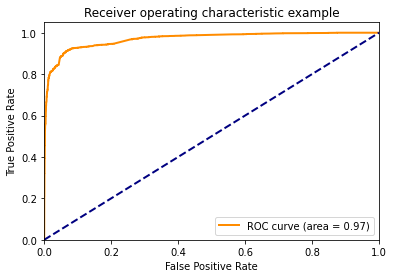

In [866]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


The ROC value that we are getting(0.97) is very close to 1, so this is a good value.

### Finding Optimal Cutoff Point


The cutoff of 0.5 was arbitrary, so we need to determine the best cutoff value:

In [867]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.283149,9196,0,1,1,1,0,0,0,0,0,0,0
1,0,0.031440,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.576636,3274,1,1,1,1,1,1,1,0,0,0,0
3,0,0.006433,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.989105,1667,1,1,1,1,1,1,1,1,1,1,1


In [868]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.816180  0.971488  0.720762
0.2   0.2  0.901069  0.931237  0.882535
0.3   0.3  0.922930  0.916981  0.926584
0.4   0.4  0.925802  0.901468  0.940752
0.5   0.5  0.925004  0.882180  0.951314
0.6   0.6  0.915909  0.828092  0.969861
0.7   0.7  0.916228  0.810063  0.981453
0.8   0.8  0.906335  0.774843  0.987120
0.9   0.9  0.887027  0.718239  0.990726


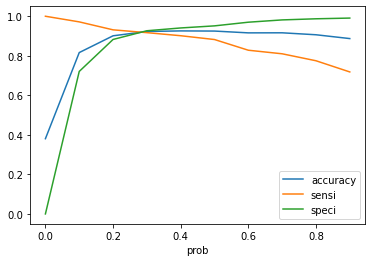

In [869]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.


In [870]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.283149,9196,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.031440,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.576636,3274,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.006433,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.989105,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [871]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.283149,9196,0,28
1,0,0.031440,4696,0,3
2,0,0.576636,3274,1,58
3,0,0.006433,2164,0,1
4,1,0.989105,1667,1,99


In [872]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.922929631402585

In [873]:
# recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9169811320754717

In [874]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3597,  285],
       [ 198, 2187]], dtype=int64)

In [911]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [912]:
# positive predictive value (precision)
print (TP / float(TP+FP))

0.8915547024952015


In [876]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9169811320754717

In [877]:
# Checking calculate specificity
TN / float(TN+FP)

0.9265842349304482

### Observation:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.97, which is very good. We have the following values for the Train Data:
- Accuracy : 92.29%
- Sensitivity : 91.70%
- Specificity : 92.66%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall. 

In [878]:
# Calculate False Postive Rate - predicting conversion when customer has not converted.
print(FP/ float(TN+FP))

0.07341576506955177


In [879]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8847087378640777


In [880]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9478260869565217


In [881]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3597,  285],
       [ 198, 2187]], dtype=int64)

In [882]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8847087378640777

In [883]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9169811320754717

In [887]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

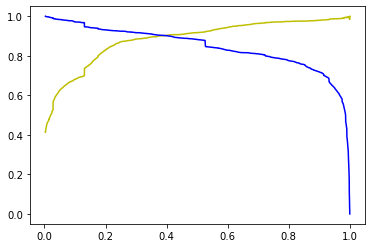

In [888]:
plt.plot(thresholds, p[:-1], "y-")
plt.plot(thresholds, r[:-1], "b-")
plt.show()

### Scaling test set

In [889]:
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,...,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7681,0.575687,-0.311318,0.092860,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
984,-0.090676,-0.550262,0.356568,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
8135,-0.423857,0.812462,-0.170849,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6915,0.242505,-0.628665,-0.170849,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2712,-0.090676,-0.421456,0.356568,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [890]:
X_test = X_test[sup_col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
7681,-0.311318,0,1,0,1,0,0,0,0,1,0,0,0
984,-0.550262,0,0,0,1,0,0,0,1,0,0,1,0
8135,0.812462,0,1,0,1,0,0,0,0,0,0,0,0
6915,-0.628665,0,0,0,0,0,0,0,0,1,0,0,0
2712,-0.421456,0,0,0,0,0,0,0,0,0,1,0,0


## Making predictions on Test set

In [891]:
X_test_sm = sm.add_constant(X_test)

In [892]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

7681    0.024819
984     0.025692
8135    0.686054
6915    0.005880
2712    0.953208
244     0.002398
4698    0.014697
8287    0.027549
6791    0.981608
8970    0.005703
dtype: float64

In [893]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
7681,0.024819
984,0.025692
8135,0.686054
6915,0.005880
2712,0.953208


In [894]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [895]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [896]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [897]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.024819
1,0,984,0.025692
2,0,8135,0.686054
3,0,6915,0.005880
4,1,2712,0.953208


In [898]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [899]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.024819
1,0,984,0.025692
2,0,8135,0.686054
3,0,6915,0.005880
4,1,2712,0.953208


In [900]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [901]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.024819,2
1,984,0,0.025692,3
2,8135,0,0.686054,69
3,6915,0,0.005880,1
4,2712,1,0.953208,95


In [902]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [903]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.024819,2,0
1,984,0,0.025692,3,0
2,8135,0,0.686054,69,1
3,6915,0,0.005880,1,0
4,2712,1,0.953208,95,1


In [904]:
# Checking the overall accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9277736411020104

In [905]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1563,  113],
       [  81,  929]], dtype=int64)

In [906]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [907]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9198019801980198

In [908]:
# Let us calculate specificity
TN / float(TN+FP)

0.9325775656324582

In [909]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8915547024952015

In [910]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9198019801980198

### Step 7: Observation:
After running the model on the Test Data these are the figures we obtain:
- Accuracy : 92.78%
- Sensitivity : 91.98%m
- Specificity : 93.26%

## Final Observations:

Let us compare the values obtained for Train & Test:

### <u> Train Data: </u>
- Accuracy : 92.29%
- Sensitivity : 91.70%
- Specificity : 92.66%

### <u> Test Data: </u>
- Accuracy : 92.78%
- Sensitivity : 91.98%
- Specificity : 93.26%

### The model is able to predict Conversion Rate pretty accurately.  Now, we should be able to give some suggestions to the CEO of the company.